In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import datetime as dt
from pathlib import Path
font={
    'size':20
}
sns.set(style="white", color_codes=True)

In [22]:
fp = Path('911/911.csv')
fp

WindowsPath('911/911.csv')

### Reading and parsing data

In [23]:
dateparse = lambda x: pd.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
df= pd.read_csv(fp,parse_dates=['timeStamp'],date_parser=dateparse)

In [24]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [900]:

df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
dtype: object

### Resetting Index

In [901]:
df.set_index('timeStamp',inplace=True)
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e
timeStamp,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1


In [902]:
df.dtypes

lat      float64
lng      float64
desc      object
zip      float64
title     object
twp       object
addr      object
e          int64
dtype: object

### Defining 'type' attribute by spliting title

In [903]:
df['type'] = df["title"].apply(lambda x: x.split(':')[0].strip())

In [904]:
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e,type
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire


In [905]:
print("The frequency of emergency type is:\n",df["type"].value_counts())

The frequency of emergency type is:
 EMS        208676
Traffic    151458
Fire        63775
Name: type, dtype: int64


# Total number of calls and it's type

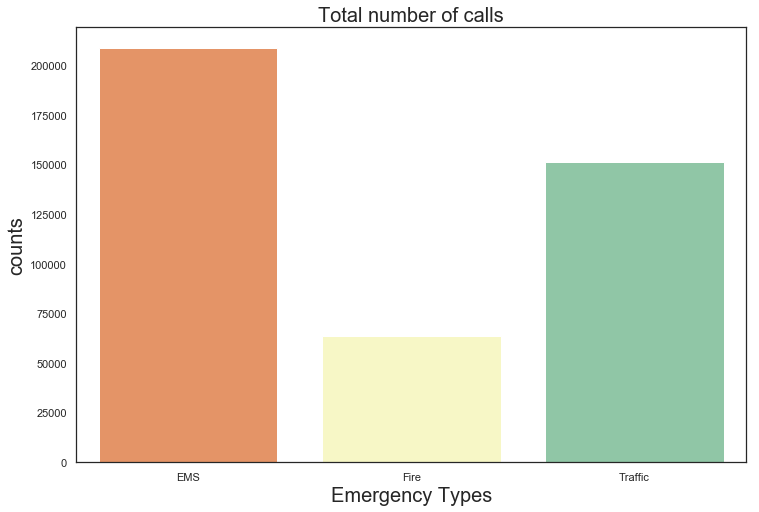

In [906]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['type'],data=df,palette='Spectral')
plt.xlabel('Emergency Types',fontdict=font)
plt.ylabel('counts',fontdict=font)
plt.title("Total number of calls",fontdict=font) 
plt.savefig('Total-calls.png')
plt.show()


In [907]:
# ems = df[df['type']=='EMS']
# ems_pivot=pd.pivot_table(ems, values='e', index=['timeStamp'], columns=['title'],aggfunc=np.sum)

# # Resampling annually 'A'
# ems_annual=ems_pivot.resample('A', np.sum).reset_index()
# ems_annual.columns = ems_annual.columns.get_level_values(0)
# ems_annual.head()

In [908]:
# fire = df[df['type']=='Fire']
# fire_pivot=pd.pivot_table(fire, values='e', index=['timeStamp'], columns=['title'],aggfunc=np.sum)

# # Resampling annually 'A'
# fire_annual=fire_pivot.resample('A', np.sum).reset_index()
# fire_annual.columns = fire_annual.columns.get_level_values(0)
# fire_annual.head()

In [909]:
# traffic = df[df['type']=='Traffic']
# traffic_pivot=pd.pivot_table(traffic, values='e', index=['timeStamp'], columns=['title'],aggfunc=np.sum)

# # Resampling annually 'A'
# traffic_annual=traffic_pivot.resample('A', np.sum).reset_index()
# traffic_annual.columns = traffic_annual.columns.get_level_values(0)
# traffic_annual.head()

### Defining Crosstab for town and type of emergency

In [910]:
tab=pd.crosstab(df['twp'],df['type']) 

In [911]:
tab.head(10)

type,EMS,Fire,Traffic
twp,,,
ABINGTON,13049,4054,8732
AMBLER,1572,609,557
BERKS COUNTY,1057,9,53
BRIDGEPORT,1199,350,773
BRYN ATHYN,306,191,338
BUCKS COUNTY,707,224,509
CHELTENHAM,8895,3097,7637
CHESTER COUNTY,2395,48,2233
COLLEGEVILLE,1019,317,584


# EMS PIE CHART

In [912]:
ems = pd.DataFrame(tab[['EMS']])
ems.sort_values(by='EMS',axis=0, ascending=False, inplace=True)

In [913]:
ems.dtypes

type
EMS    int64
dtype: object

In [914]:
ems.head()

type,EMS
twp,
NORRISTOWN,15588
LOWER MERION,13841
ABINGTON,13049
POTTSTOWN,11086
LOWER PROVIDENCE,8924


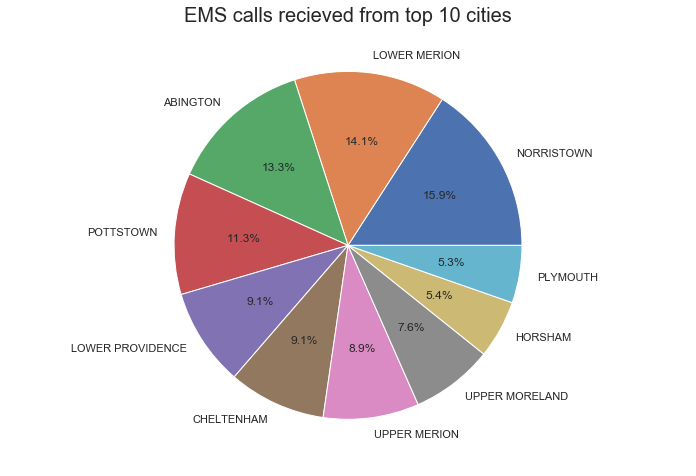

In [915]:
plt.figure(figsize=(12,8))
temp=ems[['EMS']].iloc[:10,:]
x_list = temp['EMS']
label_list = temp.index
plt.axis("equal") 
#The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("EMS calls recieved from top 10 cities",fontdict=font) 
plt.savefig('ems-pie-Top10.png')
plt.show()


#### From Norristown maximum ems calls are recieved (top 10 EMS calls cities)

# FIRE PIE CHART

In [916]:
fire = pd.DataFrame(tab[['Fire']])
fire.sort_values(by='Fire',axis=0, ascending=False, inplace=True)

In [917]:
fire.head()

type,Fire
twp,
LOWER MERION,6465
ABINGTON,4054
NORRISTOWN,3325
CHELTENHAM,3097
POTTSTOWN,2959


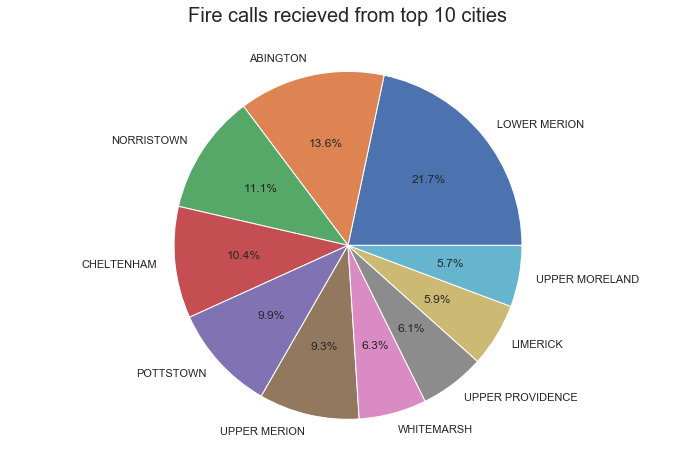

In [918]:
plt.figure(figsize=(12,8))
temp=fire[['Fire']].iloc[:10,:]
x_list = temp['Fire']
label_list = temp.index
plt.axis("equal") 
#The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Fire calls recieved from top 10 cities",fontdict=font) 
plt.savefig('fire-pie-Top10.png')
plt.show()

#### From Lower Merion maximum fire calls are recieved (top 10 Fire calls cities)

# Traffic PIE CHART

In [919]:
traffic = pd.DataFrame(tab[['Traffic']])
traffic.sort_values(by='Traffic',axis=0, ascending=False, inplace=True)

In [920]:
traffic.head()

type,Traffic
twp,
LOWER MERION,16135
UPPER MERION,11176
ABINGTON,8732
CHELTENHAM,7637
PLYMOUTH,5955


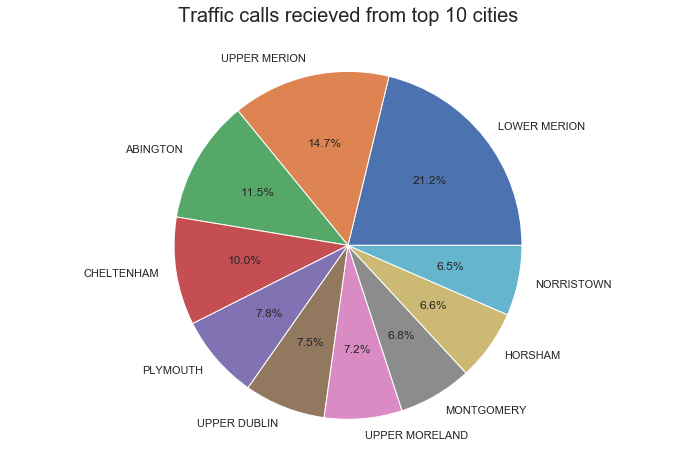

In [921]:
plt.figure(figsize=(12,8))
temp=traffic[['Traffic']].iloc[:10,:]
x_list = temp['Traffic']
label_list = temp.index
plt.axis("equal") 
#The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Traffic calls recieved from top 10 cities",fontdict=font) 
plt.savefig('Traffic-pie-Top10.png')
plt.show()


#### From Lower Merion maximum Traffic calls are recieved (top 10 Fire calls cities)

# EMS TYPE

In [922]:
ems = df[df['type']=='EMS']
ems['type'] = ems["title"].apply(lambda x: x.split(':')[1].strip())
ems.head()

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,lat,lng,desc,zip,title,twp,addr,e,type
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY


In [923]:
ems_type = pd.DataFrame(ems['type'].value_counts(sort=True, ascending=False)).iloc[:10,:]
ems_type.head()

,type
FALL VICTIM,21253
RESPIRATORY EMERGENCY,21158
CARDIAC EMERGENCY,20616
VEHICLE ACCIDENT,16928
SUBJECT IN PAIN,12001


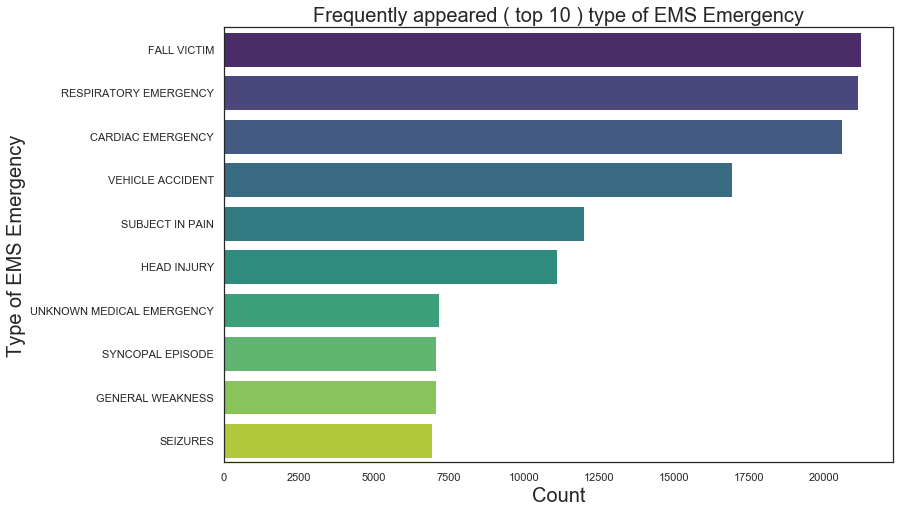

In [924]:
plt.figure(figsize=(12,8))
sns.barplot(x=ems_type['type'],y=ems_type.index,data=ems_type,palette="viridis") 
plt.xlabel("Count",fontdict=font)
plt.ylabel("Type of EMS Emergency",fontdict=font)
plt.title("Frequently appeared ( top 10 ) type of EMS Emergency",fontdict=font)
plt.savefig('Top10-EMS-Emergency.png')
plt.show()


#### In EMS emergency - Fall Victims has maximum share

# Fire Type

In [925]:
fire = df[df['type']=='Fire']
fire['type'] = fire["title"].apply(lambda x: x.split(':')[1].strip())
fire.head()

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,lat,lng,desc,zip,title,twp,addr,e,type
timeStamp,,,,,,,,,
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
2015-12-10 17:59:24,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,APPLIANCE FIRE
2015-12-10 18:05:19,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,CARBON MONOXIDE DETECTOR
2015-12-10 18:32:25,40.104206,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,UPPER MERION,HAMPTON RD & BELMONT RD,1,GAS-ODOR/LEAK
2015-12-10 18:50:23,40.224923,-75.528045,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,LIMERICK,LINFIELD TRAPPE RD,1,VEHICLE ACCIDENT


In [926]:
fire_type = pd.DataFrame(fire['type'].value_counts(sort=True, ascending=False)).iloc[:10,:]
fire_type.head()

,type
FIRE ALARM,24380
VEHICLE ACCIDENT,7153
FIRE INVESTIGATION,5955
GAS-ODOR/LEAK,4304
ELECTRICAL FIRE OUTSIDE,3105


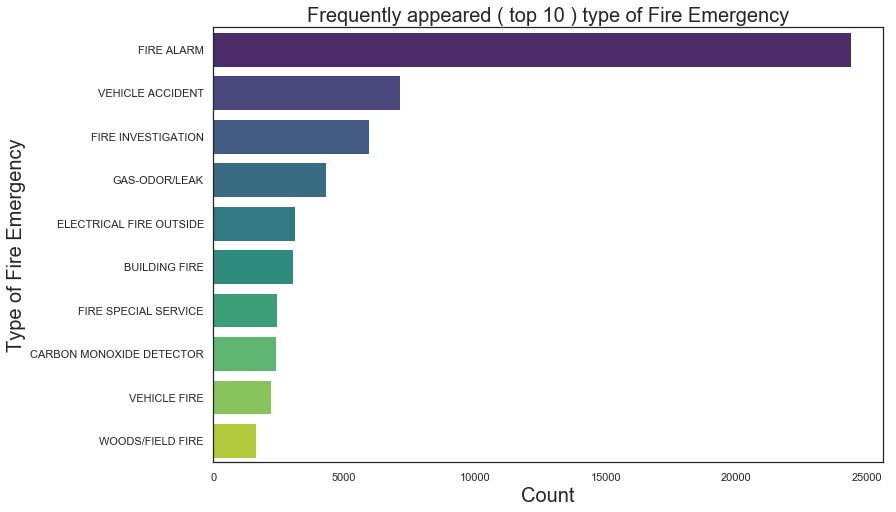

In [927]:
plt.figure(figsize=(12,8))
sns.barplot(x=fire_type['type'],y=fire_type.index,data=fire_type,palette="viridis") 
plt.xlabel("Count",fontdict=font)
plt.ylabel("Type of Fire Emergency",fontdict=font)
plt.title("Frequently appeared ( top 10 ) type of Fire Emergency",fontdict=font)
plt.savefig('Top10-Fire-Emergency.png')
plt.show()


#### In Fire emergency - Fire Alarm has maximum share

# Traffic Type

In [928]:
traffic = df[df['type']=='Traffic']
traffic['type'] = traffic["title"].apply(lambda x: x.split(':')[1].strip())
traffic.head()

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,lat,lng,desc,zip,title,twp,addr,e,type
timeStamp,,,,,,,,,
2015-12-10 17:35:41,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,VEHICLE ACCIDENT -
2015-12-10 17:33:50,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,MONTGOMERY,RT202 PKWY & KNAPP RD,1,VEHICLE ACCIDENT -
2015-12-10 16:32:10,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,BROOK RD & COLWELL LN,1,VEHICLE ACCIDENT -
2015-12-10 17:15:49,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,VEHICLE ACCIDENT -
2015-12-10 17:12:47,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,CHELTENHAM,OLD YORK RD & VALLEY RD,1,VEHICLE ACCIDENT -


In [929]:
traffic_type = pd.DataFrame(traffic['type'].value_counts(sort=True, ascending=False)).iloc[:10,:]
traffic_type.head()

,type
VEHICLE ACCIDENT -,98401
DISABLED VEHICLE -,31871
ROAD OBSTRUCTION -,14134
HAZARDOUS ROAD CONDITIONS -,4395
VEHICLE FIRE -,2286


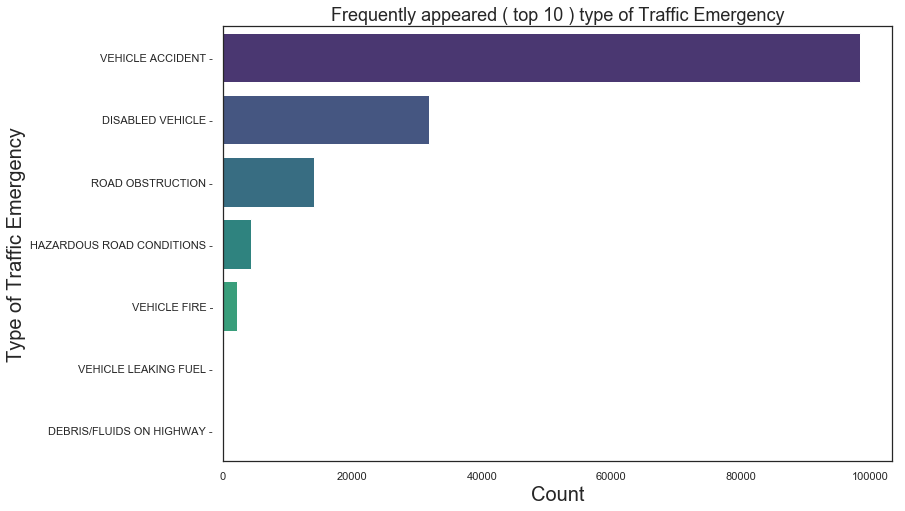

In [930]:
plt.figure(figsize=(12,8))
sns.barplot(x=traffic_type['type'],y=traffic_type.index,data=traffic_type,palette="viridis") 
plt.xlabel("Count",fontdict=font)
plt.ylabel("Type of Traffic Emergency",fontdict=font)
plt.title("Frequently appeared ( top 10 ) type of Traffic Emergency",fontsize=18)
plt.savefig('Top10-Traffic-Emergency.png')
plt.show()


#### In Traffic emergency - Vehicle Accident has maximum share

# More data exploration based on Date and Time

In [931]:
df.head()

,lat,lng,desc,zip,title,twp,addr,e,type
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


##### Creating temporary 'tempdate' attribute

In [932]:
tempdate = df.index
df['tempdate']=tempdate
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e,type,tempdate
timeStamp,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21


##### Getting 'year' attribute from 'tempdate' 

In [933]:
df['year'] = df['tempdate'].dt.year
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e,type,tempdate,year
timeStamp,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,2015
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,2015
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,2015


##### Getting 'month' attribute from 'tempdate' 

In [934]:
df['month'] = df['tempdate'].dt.month_name()
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e,type,tempdate,year,month
timeStamp,,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,2015,December
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,2015,December
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,2015,December


##### Getting 'day' attribute from 'tempdate' 

In [935]:
df['day']=df['tempdate'].dt.day_name()
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e,type,tempdate,year,month,day
timeStamp,,,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,2015,December,Thursday
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,2015,December,Thursday
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,2015,December,Thursday


##### Getting 'hours' attribute from 'tempdate' 

In [936]:
df['hours'] =df['tempdate'].dt.hour
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e,type,tempdate,year,month,day,hours
timeStamp,,,,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,2015,December,Thursday,17
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,2015,December,Thursday,17
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,2015,December,Thursday,14


##### Dropping 'tempdate' from data frame

In [937]:
df.drop(['tempdate'],axis=1,inplace=True)

In [938]:
df.head(3)

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14


# Calls/Month group by it's type

In [939]:
calls_month = df.groupby(['month', 'type'])['type'].count()

In [940]:
calls_month


month      type   
April      EMS        17255
           Fire        4983
           Traffic    11345
August     EMS        17965
           Fire        5717
           Traffic    12290
December   EMS        16131
           Fire        4717
           Traffic    12171
February   EMS        16587
           Fire        4894
           Traffic    11347
January    EMS        18403
           Fire        5637
           Traffic    13784
July       EMS        18096
           Fire        5725
           Traffic    12584
June       EMS        17644
           Fire        5618
           Traffic    12909
March      EMS        17883
           Fire        5752
           Traffic    14031
May        EMS        17819
           Fire        5168
           Traffic    12657
November   EMS        14669
           Fire        4456
           Traffic    12518
October    EMS        18565
           Fire        5636
           Traffic    13614
September  EMS        17659
           Fire        5472
 

#### Calculating percentage share of each type

In [941]:
calls_month_percent = calls_month.groupby(level=0).apply(lambda x:round(100*x/float(x.sum())))

In [942]:
calls_month_percent

month      type   
April      EMS        51.0
           Fire       15.0
           Traffic    34.0
August     EMS        50.0
           Fire       16.0
           Traffic    34.0
December   EMS        49.0
           Fire       14.0
           Traffic    37.0
February   EMS        51.0
           Fire       15.0
           Traffic    35.0
January    EMS        49.0
           Fire       15.0
           Traffic    36.0
July       EMS        50.0
           Fire       16.0
           Traffic    35.0
June       EMS        49.0
           Fire       16.0
           Traffic    36.0
March      EMS        47.0
           Fire       15.0
           Traffic    37.0
May        EMS        50.0
           Fire       14.0
           Traffic    36.0
November   EMS        46.0
           Fire       14.0
           Traffic    40.0
October    EMS        49.0
           Fire       15.0
           Traffic    36.0
September  EMS        50.0
           Fire       15.0
           Traffic    35.0
Name: typ

In [943]:
month_seq = [dt.date(2019, m, 1).strftime('%B') for m in range(1, 13)]

In [944]:
month_seq

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [945]:
#reindexing level 0
calls_month_percent=calls_month_percent.reindex(month_seq, level=0)

In [946]:
calls_month_percent

month      type   
January    EMS        49.0
           Fire       15.0
           Traffic    36.0
February   EMS        51.0
           Fire       15.0
           Traffic    35.0
March      EMS        47.0
           Fire       15.0
           Traffic    37.0
April      EMS        51.0
           Fire       15.0
           Traffic    34.0
May        EMS        50.0
           Fire       14.0
           Traffic    36.0
June       EMS        49.0
           Fire       16.0
           Traffic    36.0
July       EMS        50.0
           Fire       16.0
           Traffic    35.0
August     EMS        50.0
           Fire       16.0
           Traffic    34.0
September  EMS        50.0
           Fire       15.0
           Traffic    35.0
October    EMS        49.0
           Fire       15.0
           Traffic    36.0
November   EMS        46.0
           Fire       14.0
           Traffic    40.0
December   EMS        49.0
           Fire       14.0
           Traffic    37.0
Name: typ

In [947]:
# reindexing level 1
calls_month_percent = calls_month_percent.reindex(['EMS','Traffic','Fire'], level=1)

In [948]:
calls_month_percent

month      type   
January    EMS        49.0
           Traffic    36.0
           Fire       15.0
February   EMS        51.0
           Traffic    35.0
           Fire       15.0
March      EMS        47.0
           Traffic    37.0
           Fire       15.0
April      EMS        51.0
           Traffic    34.0
           Fire       15.0
May        EMS        50.0
           Traffic    36.0
           Fire       14.0
June       EMS        49.0
           Traffic    36.0
           Fire       16.0
July       EMS        50.0
           Traffic    35.0
           Fire       16.0
August     EMS        50.0
           Traffic    34.0
           Fire       16.0
September  EMS        50.0
           Traffic    35.0
           Fire       15.0
October    EMS        49.0
           Traffic    36.0
           Fire       15.0
November   EMS        46.0
           Traffic    40.0
           Fire       14.0
December   EMS        49.0
           Traffic    37.0
           Fire       14.0
Name: typ

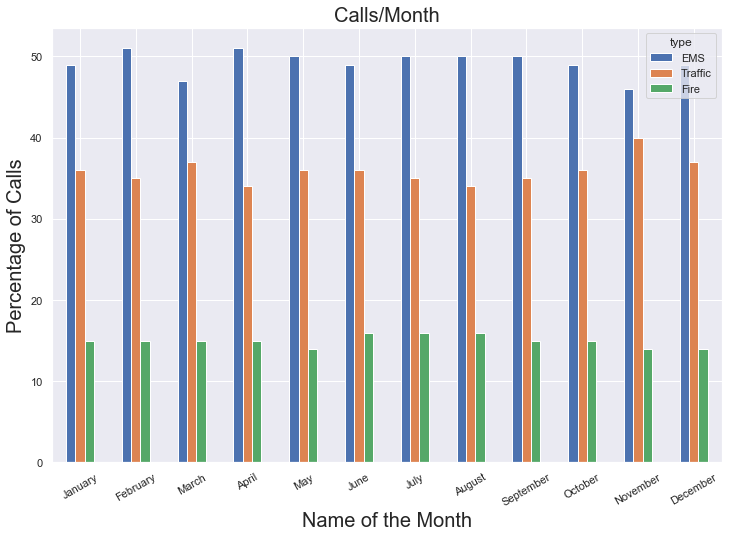

In [949]:
sns.set(rc={'figure.figsize':(12, 8)})
calls_month_percent.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=30)
plt.title('Calls/Month', fontdict=font)
plt.savefig('call_vs_month.png')

# Calls/Day group by it's type

In [950]:
calls_day = df.groupby(['day','type'])['type'].count()

In [951]:
calls_day

day        type   
Friday     EMS        31010
           Fire        9683
           Traffic    25058
Monday     EMS        30431
           Fire        9292
           Traffic    21595
Saturday   EMS        28970
           Fire        8898
           Traffic    19225
Sunday     EMS        27460
           Fire        8338
           Traffic    14326
Thursday   EMS        30110
           Fire        8994
           Traffic    24055
Tuesday    EMS        30414
           Fire        9186
           Traffic    23441
Wednesday  EMS        30281
           Fire        9384
           Traffic    23758
Name: type, dtype: int64

In [952]:
calls_day_percent = calls_day.groupby(level=0).apply(lambda x:round(100*x/float(x.sum())))

In [953]:
calls_day_percent

day        type   
Friday     EMS        47.0
           Fire       15.0
           Traffic    38.0
Monday     EMS        50.0
           Fire       15.0
           Traffic    35.0
Saturday   EMS        51.0
           Fire       16.0
           Traffic    34.0
Sunday     EMS        55.0
           Fire       17.0
           Traffic    29.0
Thursday   EMS        48.0
           Fire       14.0
           Traffic    38.0
Tuesday    EMS        48.0
           Fire       15.0
           Traffic    37.0
Wednesday  EMS        48.0
           Fire       15.0
           Traffic    37.0
Name: type, dtype: float64

In [954]:
import calendar
day_seq = list(calendar.day_name)
day_seq

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [955]:
calls_day_percent=calls_day_percent.reindex(day_seq, level=0)
calls_day_percent = calls_day_percent.reindex(['EMS','Traffic','Fire'], level=1)

In [956]:
calls_day_percent

day        type   
Monday     EMS        50.0
           Traffic    35.0
           Fire       15.0
Tuesday    EMS        48.0
           Traffic    37.0
           Fire       15.0
Wednesday  EMS        48.0
           Traffic    37.0
           Fire       15.0
Thursday   EMS        48.0
           Traffic    38.0
           Fire       14.0
Friday     EMS        47.0
           Traffic    38.0
           Fire       15.0
Saturday   EMS        51.0
           Traffic    34.0
           Fire       16.0
Sunday     EMS        55.0
           Traffic    29.0
           Fire       17.0
Name: type, dtype: float64

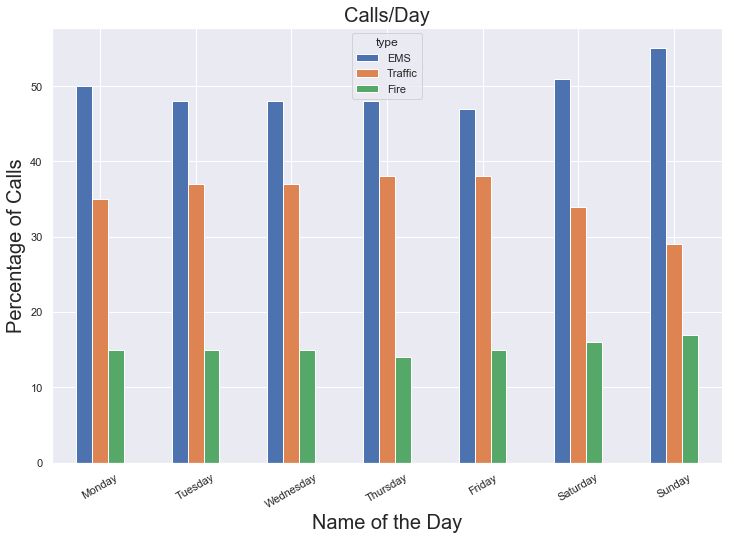

In [957]:
sns.set(rc={'figure.figsize':(12, 8)})
calls_day_percent.unstack().plot(kind='bar')
plt.xlabel('Name of the Day', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=30)
plt.title('Calls/Day', fontdict=font)
plt.savefig('call_vs_day.png')

EMS calls is more during weekends compare to weekdays - Saturday, Sunday(max)

Traffic calls is more during weekdays compare to otherdays

# Calls/Hour group by it's type

In [958]:
calls_hour = df.groupby(['hours','type'])['type'].count()

In [959]:
calls_hour

hours  type   
0      EMS         5263
       Fire        1341
       Traffic     2046
1      EMS         4711
       Fire        1104
       Traffic     1566
2      EMS         4425
       Fire         981
       Traffic     1390
3      EMS         3956
       Fire         930
       Traffic     1128
4      EMS         3840
       Fire         905
       Traffic     1156
5      EMS         4227
       Fire        1184
       Traffic     1896
6      EMS         5600
       Fire        1557
       Traffic     3967
7      EMS         7629
       Fire        2307
       Traffic     7675
8      EMS         9812
       Fire        2941
       Traffic     8848
9      EMS        11708
       Fire        3266
       Traffic     7741
                  ...  
14     EMS        11763
       Fire        3797
       Traffic    10276
15     EMS        11448
       Fire        3768
       Traffic    11760
16     EMS        11527
       Fire        3922
       Traffic    12289
17     EMS        11212
 

In [960]:
calls_hour_percent = calls_hour.groupby(level=0).apply(lambda x:round(100*x/float(x.sum())))

In [961]:
calls_hour_percent

hours  type   
0      EMS        61.0
       Fire       16.0
       Traffic    24.0
1      EMS        64.0
       Fire       15.0
       Traffic    21.0
2      EMS        65.0
       Fire       14.0
       Traffic    20.0
3      EMS        66.0
       Fire       15.0
       Traffic    19.0
4      EMS        65.0
       Fire       15.0
       Traffic    20.0
5      EMS        58.0
       Fire       16.0
       Traffic    26.0
6      EMS        50.0
       Fire       14.0
       Traffic    36.0
7      EMS        43.0
       Fire       13.0
       Traffic    44.0
8      EMS        45.0
       Fire       14.0
       Traffic    41.0
9      EMS        52.0
       Fire       14.0
       Traffic    34.0
                  ... 
14     EMS        46.0
       Fire       15.0
       Traffic    40.0
15     EMS        42.0
       Fire       14.0
       Traffic    44.0
16     EMS        42.0
       Fire       14.0
       Traffic    44.0
17     EMS        40.0
       Fire       15.0
       Traffic    4

In [962]:
calls_hour_percent = calls_hour_percent.reindex(['EMS','Traffic','Fire'], level=1)

In [963]:
calls_hour_percent

hours  type   
0      EMS        61.0
       Traffic    24.0
       Fire       16.0
1      EMS        64.0
       Traffic    21.0
       Fire       15.0
2      EMS        65.0
       Traffic    20.0
       Fire       14.0
3      EMS        66.0
       Traffic    19.0
       Fire       15.0
4      EMS        65.0
       Traffic    20.0
       Fire       15.0
5      EMS        58.0
       Traffic    26.0
       Fire       16.0
6      EMS        50.0
       Traffic    36.0
       Fire       14.0
7      EMS        43.0
       Traffic    44.0
       Fire       13.0
8      EMS        45.0
       Traffic    41.0
       Fire       14.0
9      EMS        52.0
       Traffic    34.0
       Fire       14.0
                  ... 
14     EMS        46.0
       Traffic    40.0
       Fire       15.0
15     EMS        42.0
       Traffic    44.0
       Fire       14.0
16     EMS        42.0
       Traffic    44.0
       Fire       14.0
17     EMS        40.0
       Traffic    45.0
       Fire       1

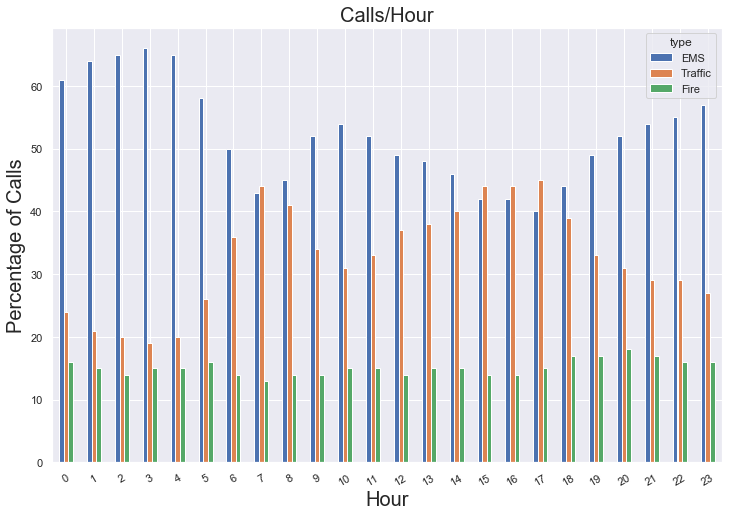

In [964]:
sns.set(rc={'figure.figsize':(12, 8)})
calls_hour_percent.unstack().plot(kind='bar')
plt.xlabel('Hour', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=30)
plt.title('Calls/Hour', fontdict=font)
plt.savefig('call_vs_hour.png')

# Dividing Data Based on It's Type EMS, Traffic, Fire.

In [965]:
# Extracting data for EMS
ems_city = df[df['type']=='EMS']

In [966]:
ems_city.shape

(208676, 13)

In [967]:
ems_city.head()

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015,December,Thursday,15


In [968]:
# Extracting data for Traffic
traffic_city =df[df['type']=='Traffic']

In [969]:
traffic_city.shape

(151458, 13)

In [970]:
traffic_city.head()

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 17:35:41,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015,December,Thursday,17
2015-12-10 17:33:50,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,2015,December,Thursday,17
2015-12-10 16:32:10,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,2015,December,Thursday,16
2015-12-10 17:15:49,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,2015,December,Thursday,17
2015-12-10 17:12:47,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,2015,December,Thursday,17


In [971]:
# Extracting Data for Fire
fire_city = df[df['type']=='Fire']

In [972]:
fire_city.shape

(63775, 13)

In [973]:
fire_city.head()

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14
2015-12-10 17:59:24,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,2015,December,Thursday,17
2015-12-10 18:05:19,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,Fire,2015,December,Thursday,18
2015-12-10 18:32:25,40.104206,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,UPPER MERION,HAMPTON RD & BELMONT RD,1,Fire,2015,December,Thursday,18
2015-12-10 18:50:23,40.224923,-75.528045,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,LIMERICK,LINFIELD TRAPPE RD,1,Fire,2015,December,Thursday,18


# Traffic Call Locations on Map

In [974]:
gdf_traffic = gpd.GeoDataFrame(
    traffic_city)
gdf_traffic.head()

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 17:35:41,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015,December,Thursday,17
2015-12-10 17:33:50,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,2015,December,Thursday,17
2015-12-10 16:32:10,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,2015,December,Thursday,16
2015-12-10 17:15:49,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,2015,December,Thursday,17
2015-12-10 17:12:47,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,2015,December,Thursday,17


In [975]:
gdf_traffic.dtypes

lat      float64
lng      float64
desc      object
zip      float64
title     object
twp       object
addr      object
e          int64
type      object
year       int64
month     object
day       object
hours      int64
dtype: object

In [976]:
new_geo = gpd.GeoDataFrame()
new_geo['lat']=gdf_traffic['lat'].astype('float64')
new_geo['lng']=gdf_traffic['lng'].astype('float64')
new_geo['title']=gdf_traffic['title'].astype('object')
location = new_geo['lat'].mean(), new_geo['lng'].mean()

new_geo.shape

(151458, 3)

In [977]:
new_geo.head()


,lat,lng,title
timeStamp,,,
2015-12-10 17:35:41,40.102398,-75.291458,Traffic: VEHICLE ACCIDENT -
2015-12-10 17:33:50,40.231990,-75.251891,Traffic: VEHICLE ACCIDENT -
2015-12-10 16:32:10,40.084161,-75.308386,Traffic: VEHICLE ACCIDENT -
2015-12-10 17:15:49,40.174131,-75.098491,Traffic: VEHICLE ACCIDENT -
2015-12-10 17:12:47,40.062974,-75.135914,Traffic: VEHICLE ACCIDENT -


In [978]:
locationlist = new_geo[['lat','lng']].values.tolist()
labels = "CITY => "+ gdf_traffic['twp']+"\n"+gdf_traffic['title']

m = folium.Map(location=location, zoom_start=10)


for point in range(1,100): 
    popup = folium.Popup(labels[point], parse_html=True)
    icon = folium.Icon(color='orange')
    folium.Marker(locationlist[point], popup=popup, icon=icon).add_to(m)
    
m.save(outfile= "Traffic.html")
m



# Fire Call Locations on Map

In [979]:
gdf_fire = gpd.GeoDataFrame(
    fire_city)
gdf_fire.head()

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14
2015-12-10 17:59:24,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,2015,December,Thursday,17
2015-12-10 18:05:19,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,Fire,2015,December,Thursday,18
2015-12-10 18:32:25,40.104206,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,UPPER MERION,HAMPTON RD & BELMONT RD,1,Fire,2015,December,Thursday,18
2015-12-10 18:50:23,40.224923,-75.528045,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,LIMERICK,LINFIELD TRAPPE RD,1,Fire,2015,December,Thursday,18


In [980]:
new_geo = gpd.GeoDataFrame()
new_geo['lat']=gdf_fire['lat'].astype('float64')
new_geo['lng']=gdf_fire['lng'].astype('float64')
location = new_geo['lat'].mean(), new_geo['lng'].mean()

new_geo.shape

(63775, 2)

In [981]:
new_geo.head()

,lat,lng
timeStamp,,
2015-12-10 14:39:21,40.121182,-75.351975
2015-12-10 17:59:24,40.199006,-75.300058
2015-12-10 18:05:19,40.028903,-75.351822
2015-12-10 18:32:25,40.104206,-75.367665
2015-12-10 18:50:23,40.224923,-75.528045


In [982]:
locationlist = new_geo[['lat','lng']].values.tolist()

labels = "CITY => "+ gdf_fire['twp']+"\n"+gdf_fire['title']

m = folium.Map(location=location, zoom_start=10)

for point in range(1,100): 
    popup = folium.Popup(labels[point], parse_html=True)
    icon = folium.Icon(color='purple')
    folium.Marker(locationlist[point], popup=popup,icon=icon).add_to(m)

m.save(outfile="Fire.html")
m

# EMS Call Locations on Map

In [983]:
gdf_ems = gpd.GeoDataFrame(
    ems_city)
gdf_ems.head()

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015,December,Thursday,15


In [984]:
new_geo = gpd.GeoDataFrame()
new_geo['lat']=gdf_ems['lat'].astype('float64')
new_geo['lng']=gdf_ems['lng'].astype('float64')
location = new_geo['lat'].mean(), new_geo['lng'].mean()

new_geo.shape

(208676, 2)

In [985]:
new_geo.head()

,lat,lng
timeStamp,,
2015-12-10 17:10:52,40.297876,-75.581294
2015-12-10 17:29:21,40.258061,-75.264680
2015-12-10 16:47:36,40.116153,-75.343513
2015-12-10 16:56:52,40.251492,-75.603350
2015-12-10 15:39:04,40.253473,-75.283245


In [986]:
locationlist = new_geo[['lat','lng']].values.tolist()

labels = "CITY => "+ gdf_ems['twp']+"\n"+gdf_ems['title']

m = folium.Map(location=location, zoom_start=10)

for point in range(1,100): 
    popup = folium.Popup(labels[point], parse_html=True)
    icon = folium.Icon(color='blue')
    folium.Marker(locationlist[point], popup=popup,icon=icon).add_to(m)
    
m.save(outfile= "EMS.html")
m

# All Maps in One

In [987]:
gdf = gpd.GeoDataFrame(
    df)
gdf.head()

,lat,lng,desc,zip,title,twp,addr,e,type,year,month,day,hours
timeStamp,,,,,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16


In [988]:
new_geo = gpd.GeoDataFrame()
new_geo['lat']=gdf['lat'].astype('float64')
new_geo['lng']=gdf['lng'].astype('float64')
new_geo['type']=gdf['type'].astype('object')
location = new_geo['lat'].mean(), new_geo['lng'].mean()

new_geo.shape

(423909, 3)

In [989]:
locationlist = new_geo[['lat','lng']].values.tolist()
labels = "CITY => "+ gdf['twp']+"\n"+gdf['title']
etype = gdf['type'].values.tolist()

m = folium.Map(location=location, zoom_start=10)

for point in range(1,300):
    if(etype[point] == 'EMS'):
        icon = folium.Icon(color='blue')
        label=labels[point]
    elif(etype[point]=='Traffic'):
        icon = folium.Icon(color='purple')
        label=labels[point]
    elif(etype[point]=='Fire'):
        icon = folium.Icon(color='red')
        label=labels[point]
    
    popup = folium.Popup(label, parse_html=True)
    folium.Marker(locationlist[point], popup=popup, icon=icon).add_to(m)
    
m.save(outfile= "All-Map-In-One.html")
m